In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt .style.use('fivethirtyeight')
%matplotlib inline


In [ ]:
from sklearn.metrics import r2_score
from scipy. optimize import curve_fit

In [ ]:
filename = './internet_traffic_hist.csv'
df_hist = pd.read_csv(filename)

In [ ]:
df_hist.head()

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009


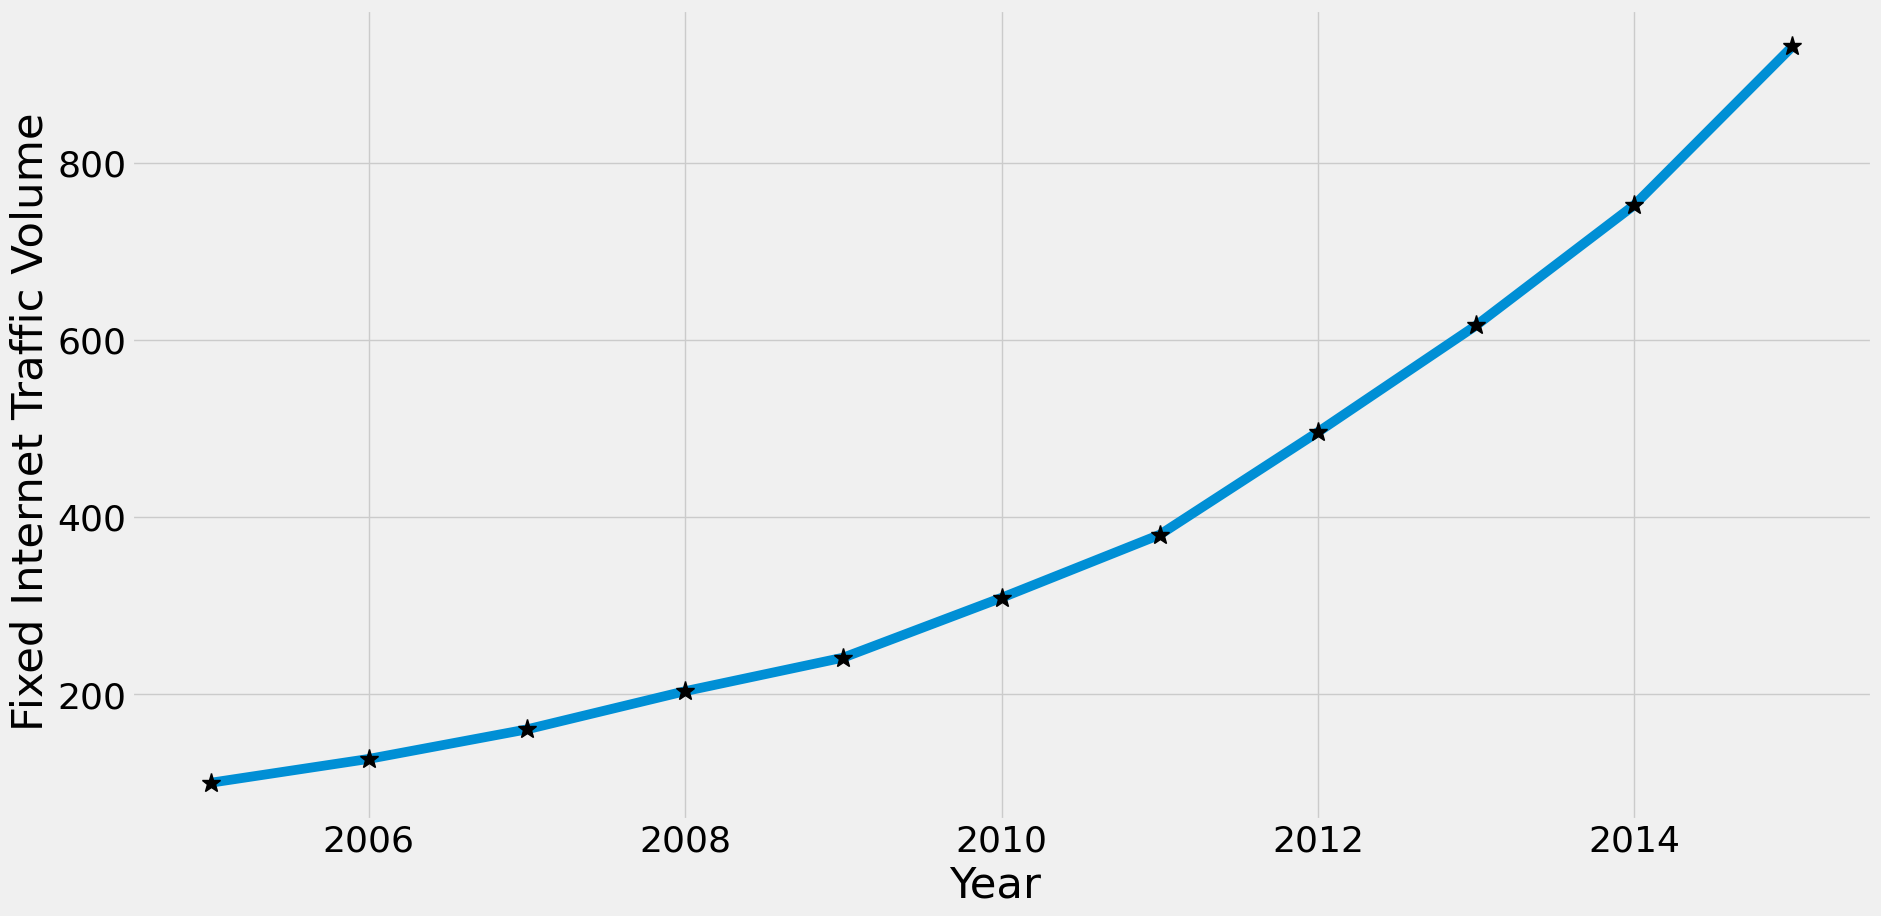

In [ ]:

# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

# XY Plot of year and traffic
plt.plot(df_hist.year , df_hist.traffic , linewidth = 7)
plt.plot(df_hist.year , df_hist.traffic ,'*k', markersize = 14)

# Add axis labels
plt.xlabel('Year ')
plt.ylabel('Fixed Internet Traffic Volume ')
plt.show()

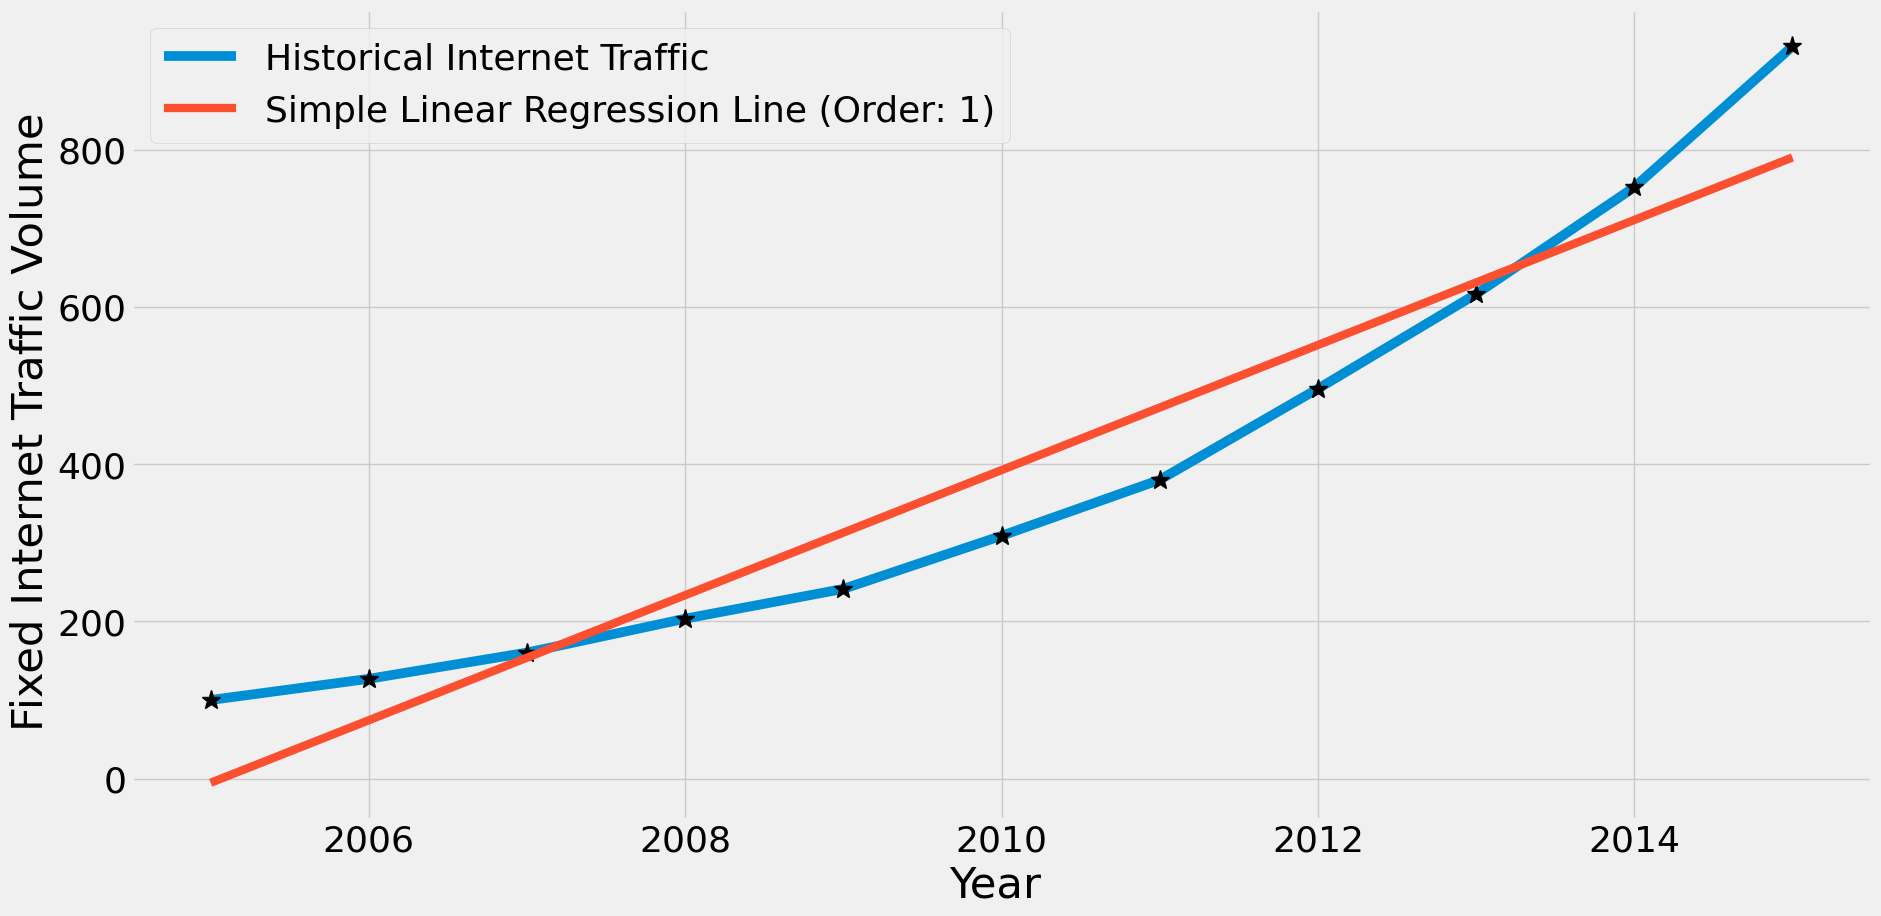

In [ ]:
plt.figure(figsize = (20,10))

order = 1

x = df_hist.year
y = df_hist.traffic

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 7)
plt.plot(x, y,'*', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))

plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper left')

plt.show()

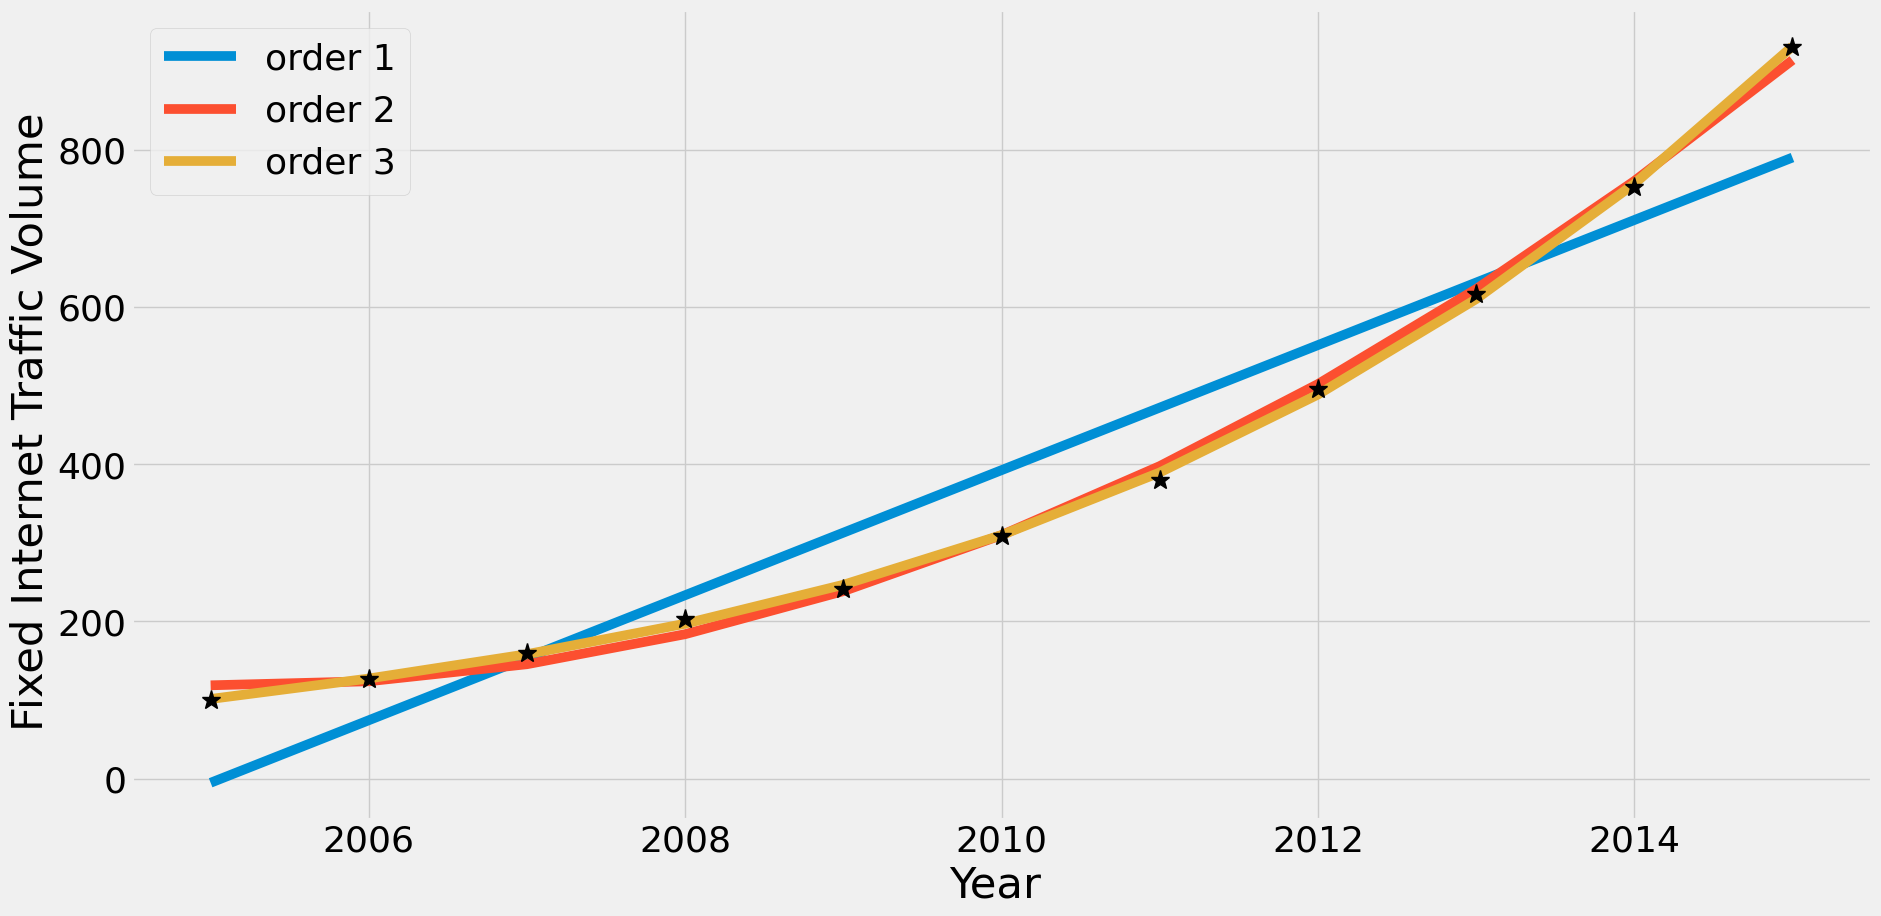

In [ ]:
models = []       # to store polynomial model parameters (list of poly1d objects)

orders = 3 

#Try polynomial models with increasing order
for order in range(1,orders+1):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x , y , order)))
    models.append(p)

# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models:
    plt.plot(x , model(x ), label = 'order {}'.format(len(model )), linewidth = 7)
# XY Plot of year and traffic
plt.plot(x , y ,'*k', markersize = 14)


# Add axis labels
plt.xlabel('Year ')
plt.ylabel('Fixed Internet Traffic Volume ')
plt.legend(loc = 'upper left')
plt.show()